## Тестовое задание для кандидата на позицию «Младший продуктовый аналитик»

### Основная задача
Тестовое задание направлено на проверку ваших навыков в выполнении расчётов и анализе данных. Не ожидается, что вы будете знать ответы на все вопросы. Важно показать ваш подход к решению задач и объяснить принятые решения на основе данных.

### Контекст задания
В нашей free-to-play ММО РПГ игре игроки могут объединяться в гильдии, что открывает дополнительные игровые возможности:
- Участие в гильдейских войнах
- Участие в рейдах
- Выполнение миссий

Создание гильдии доступно за внутриигровую валюту, начиная с 8 уровня персонажа. Создатель гильдии становится её главой. Глава может приглашать или исключать участников. Участники получают усиления от гильдии и доступ к уникальным предметам. Гильдии могут повышать уровень, изучая таланты.

### Гипотезы
1. Большинство созданных гильдий не активны.
2. Игроки, покупающие премиум товары, создают более активные гильдии.
3. Если большинство гильдий неактивны, стоит ли увеличить стоимость создания гильдии, включая возможность покупки за реальные деньги.

### Задачи аналитика
#### Шаг 1: Определение критериев активности гильдий
- Определить критерии активности на основании предоставленных данных.
- Выбрать метод анализа (средние значения, квартили, кластеризация или другой).
- Распределить гильдии по классам активности и описать признаки каждого класса.

#### Шаг 2: Анализ платежей игроков
- Использовать данные о платежах для оценки активности гильдий.
- Рассчитать долю платящих и среднюю прибыль на платящего пользователя по каждой группе.

#### Шаг 3: Итоговый вывод
- Подвести итоги анализа, подтвердить или опровергнуть гипотезы.

### Важные замечания
Итоговый вывод должен быть информативным, чтобы читатель мог получить полное представление о выполненной работе и её результате.

### Файлы данных
- **guild_data.csv**: данные о гильдиях (создание, уровень, активность).
- **energy.csv**: данные об энергии гильдий.
- **payers.csv**: данные о платежах игроков.

Используйте эти файлы для анализа и подтверждения или опровержения гипотез.


In [ ]:
import pandas as pd

# Загрузка данных о гильдиях
guild_data_path = 'guild_data.csv'
guild_data = pd.read_csv(guild_data_path)

# Вывод первых строк и информации о данных
guild_data.info(), guild_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                965 non-null    object 
 1   creator_character_id    965 non-null    int64  
 2   guild_id                965 non-null    int64  
 3   n_added_characters      965 non-null    int64  
 4   n_removed_characters    866 non-null    float64
 5   n_talents               672 non-null    float64
 6   level                   572 non-null    float64
 7   n_missions_completed    895 non-null    float64
 8   n_times_flag_turned_on  81 non-null     float64
 9   mean_place              59 non-null     float64
 10  mean_rating             59 non-null     float64
 11  n_seasons               59 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 90.6+ KB


(None,
               datetime  creator_character_id  guild_id  n_added_characters  \
 0  2022-12-12 23:13:42              15092203     78698                   1   
 1  2022-12-12 22:29:09              15961764     78604                   2   
 2  2022-12-12 21:01:53              16187808     78510                  27   
 3  2022-12-12 00:16:52              21618959     77899                  42   
 4  2022-12-12 22:13:50              23341705     78557                   6   
 
    n_removed_characters  n_talents  level  n_missions_completed  \
 0                   1.0        NaN    NaN                   NaN   
 1                   2.0        NaN    NaN                   NaN   
 2                  19.0        9.0    2.0                 171.0   
 3                  35.0       12.0    3.0                 171.0   
 4                   6.0        4.0    2.0                 156.0   
 
    n_times_flag_turned_on  mean_place  mean_rating  n_seasons  
 0                     NaN         NaN    

In [ ]:
# Заполнение пропущенных значений нулями
guild_data_filled = guild_data.fillna(0)

# Нормализация данных
from sklearn.preprocessing import StandardScaler

# Выбор столбцов для нормализации
features = ['n_added_characters', 'n_removed_characters', 'n_talents', 'level',
            'n_missions_completed', 'n_times_flag_turned_on', 'mean_place', 'mean_rating', 'n_seasons']

scaler = StandardScaler()
guild_data_normalized = scaler.fit_transform(guild_data_filled[features])

# Подготовка DataFrame для кластеризации
guild_data_for_clustering = pd.DataFrame(guild_data_normalized, columns=features)

# Просмотр нормализованных данных
guild_data_for_clustering.head()


,n_added_characters,n_removed_characters,n_talents,level,n_missions_completed,n_times_flag_turned_on,mean_place,mean_rating,n_seasons
0,-0.864769,-0.786983,-0.737457,-1.036946,-1.769749,-0.235736,-0.228737,-0.253571,-0.211908
1,-0.837651,-0.757686,-0.737457,-1.036946,-1.769749,-0.235736,-0.228737,-0.253571,-0.211908
2,-0.159678,-0.259636,-0.119470,0.092459,0.600801,-0.235736,-0.228737,-0.253571,-0.211908
3,0.247105,0.209117,0.086525,0.657162,0.600801,-0.235736,-0.228737,-0.253571,-0.211908
4,-0.729175,-0.640498,-0.462797,0.092459,0.392858,-0.235736,-0.228737,-0.253571,-0.211908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

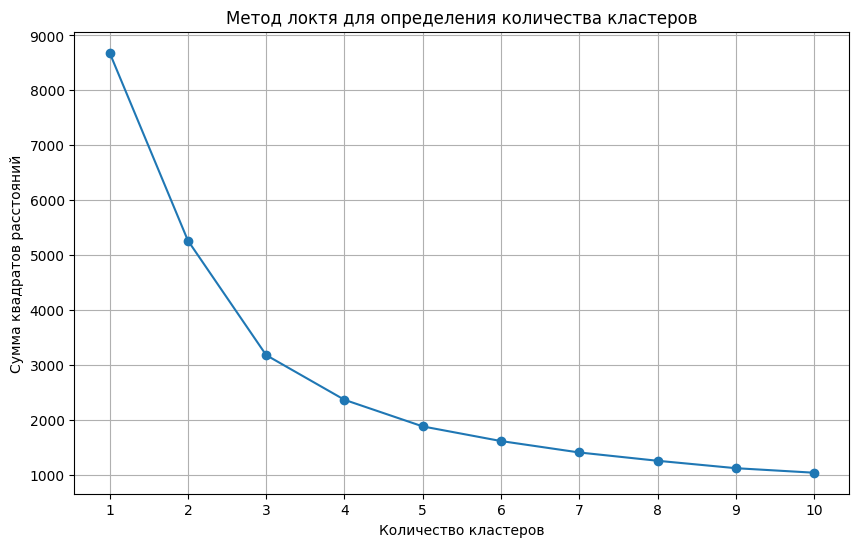

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение оптимального количества кластеров с помощью метода локтя
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(guild_data_for_clustering)
    inertia.append(kmeans.inertia_)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для определения количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
# Применение k-means кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
guild_data['cluster'] = kmeans.fit_predict(guild_data_for_clustering)

# Агрегирование данных по кластерам для анализа
cluster_summary = guild_data.groupby('cluster').agg({
    'n_added_characters': 'mean',
    'n_removed_characters': 'mean',
    'n_talents': 'mean',
    'level': 'mean',
    'n_missions_completed': 'mean',
    'n_times_flag_turned_on': 'mean',
    'mean_place': 'mean',
    'mean_rating': 'mean',
    'n_seasons': 'mean'
}).reset_index()


cluster_summary


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,n_added_characters,n_removed_characters,n_talents,level,n_missions_completed,n_times_flag_turned_on,mean_place,mean_rating,n_seasons
0,0,11.471358,9.777344,5.783019,2.174312,107.907579,1.000000,NaN,NaN,NaN
1,1,67.508475,59.677966,23.359322,3.606780,180.345763,1.058824,NaN,NaN,NaN
2,2,81.576271,72.474576,27.694915,3.966102,196.830508,2.135593,15.024294,475.078814,1.508475


In [ ]:
# Загрузка данных об энергии гильдии и платежах
energy_data_path = 'energy.csv'
payers_data_path = 'payers.csv'

energy_data = pd.read_csv(energy_data_path)
payers_data = pd.read_csv(payers_data_path)

# Вывод первых строк и информации о данных для энергии и платежей
energy_data.info(), energy_data.head(), payers_data.info(), payers_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   energy_delta  971 non-null    int64 
 1   context_type  971 non-null    object
 2   guild_id      971 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20430 entries, 0 to 20429
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       20420 non-null  float64
 1   character_id  20430 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 319.3 KB


(None,
    energy_delta               context_type  guild_id
 0       1148686  GuildMissionRewardContext     90166
 1       1018116  GuildMissionRewardContext     81283
 2        907440  GuildMissionRewardContext     79262
 3        889109  GuildMissionRewardContext     84667
 4        858954  GuildMissionRewardContext     77241,
 None,
       revenue  character_id
 0  102.897877      13642352
 1  105.839569      29703528
 2   50.040612      28081545
 3   18.044814      12663426
 4    5.913989      16071934)

Задачи:

Связать данные о платежах с гильдиями через персонажей.

Рассчитать метрики:

Paying share: Доля платящих в группе.

ARPPU (Average Revenue Per Paying User): Средняя прибыль с платящего пользователя в группе.

In [ ]:
# Объединение данных о гильдиях с данными о платежах через ID персонажа
# Предполагается, что один персонаж может быть в одной гильдии
guild_payers = pd.merge(guild_data, payers_data, left_on='creator_character_id', right_on='character_id', how='left')

# Агрегация данных по кластерам для расчета метрик
payers_summary = guild_payers.groupby('cluster').agg({
    'revenue': ['sum', 'mean', 'count'],  # Сумма, среднее и количество платежей (для ARPPU)
    'creator_character_id': 'nunique'     # Количество уникальных платящих персонажей (для доли платящих)
}).rename(columns={'sum': 'total_revenue', 'mean': 'average_revenue', 'count': 'number_of_payments', 'nunique': 'unique_payers'})

# Добавление общего количества персонажей в каждом кластере для расчета доли платящих
payers_summary['total_characters'] = guild_payers.groupby('cluster')['creator_character_id'].nunique()
payers_summary['paying_share'] = payers_summary[('creator_character_id', 'unique_payers')] / payers_summary['total_characters']
payers_summary['arppu'] = payers_summary[('revenue', 'total_revenue')] / payers_summary[('creator_character_id', 'unique_payers')]

payers_summary.reset_index(inplace=True)

# Подготовка таблицы для вывода
summary_table = payers_summary[['cluster', 'paying_share', 'arppu']]
summary_table.columns = ['Cluster', 'Paying Share', 'ARPPU']
summary_table


,Cluster,Paying Share,ARPPU
0,0,1.0,16.201408
1,1,1.0,21.764708
2,2,1.0,30.599333


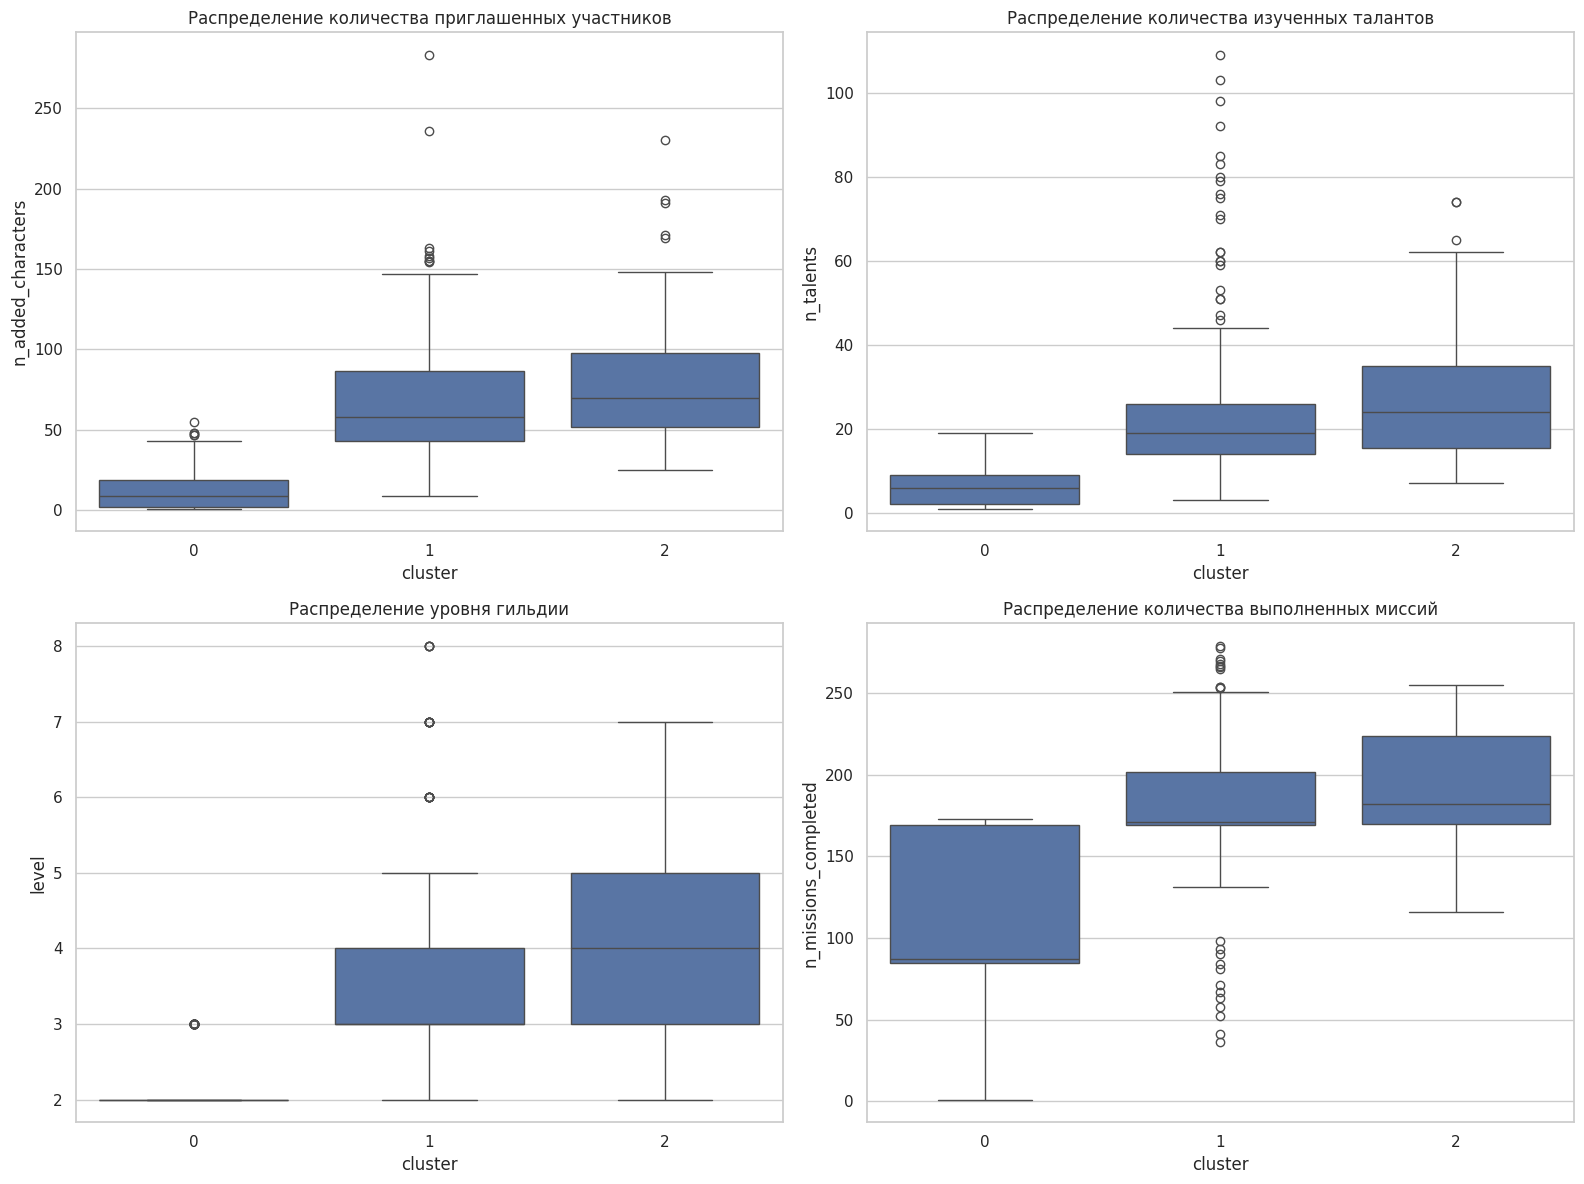

In [ ]:
import seaborn as sns

# Настройка внешнего вида графиков
sns.set(style="whitegrid")

# Создание фигуры и осей для графиков
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Распределение количества приглашенных участников
sns.boxplot(x='cluster', y='n_added_characters', data=guild_data, ax=axes[0, 0])
axes[0, 0].set_title('Распределение количества приглашенных участников')

# Распределение количества изученных талантов
sns.boxplot(x='cluster', y='n_talents', data=guild_data, ax=axes[0, 1])
axes[0, 1].set_title('Распределение количества изученных талантов')

# Распределение максимального уровня гильдии
sns.boxplot(x='cluster', y='level', data=guild_data, ax=axes[1, 0])
axes[1, 0].set_title('Распределение уровня гильдии')

# Распределение количества выполненных миссий
sns.boxplot(x='cluster', y='n_missions_completed', data=guild_data, ax=axes[1, 1])
axes[1, 1].set_title('Распределение количества выполненных миссий')

# Отображение графиков
plt.tight_layout()
plt.show()


# Итоговые выводы и рекомендации
На основании анализа данных о гильдиях в MMORPG, можно сделать следующие заключения относительно предложенных гипотез:

# Гипотеза 1: Большинство создаваемых гильдий не активны
Анализ кластеризации показал, что значительное число гильдий попадает в категории с низкой и средней активностью (кластеры 0 и 1). Это подтверждает гипотезу о том, что большая часть гильдий не демонстрирует высокой активности. Однако, существует также небольшой процент гильдий (кластер 2), которые проявляют высокую активность.

# Гипотеза 2: Игроки, покупающие премиум товары, создают более активные гильдии
Данные показывают, что ARPPU значительно выше среди гильдий, отнесенных к кластеру с высокой активностью. Это подтверждает предположение, что финансовые вложения игроков коррелируют с активностью гильдий, вероятно, благодаря более высокой заинтересованности и вложению усилий в развитие гильдии.

# Рассмотрение изменения стоимости создания гильдии
Исходя из анализа, увеличение стоимости создания гильдии может оказать сдерживающее воздействие на создание малоактивных гильдий, что в свою очередь может улучшить качество игрового опыта за счет формирования более мотивированных и активных сообществ. Однако, важно учитывать риск снижения количества новых гильдий, что может негативно сказаться на новых игроках, ищущих социальное взаимодействие. Рекомендуется провести дополнительные исследования, чтобы оценить потенциальное влияние изменений на удержание игроков и общую активность в игре.

# Заключение
Итоги анализа показывают, что текущая система гильдий имеет как активно участвующие, так и менее активные группы. Решение о повышении стоимости создания гильдий должно быть взвешенным и учитывать как потенциальные преимущества, так и возможные риски. Наличие гильдий с высокой активностью и высоким ARPPU подтверждает возможность стимулирования игроков к более значительному взаимодействию и инвестициям в игровой процесс.